In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install six
!pip install graphviz
!pip install pydot


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
#from sklearn.externals.six import StringIO  
from six import StringIO
from sklearn.tree import export_graphviz

from IPython.display import Image  
import pydot 

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


# Decision Tree

In [ ]:
df = pd.read_csv('kyphosis.csv')
df

,Unnamed: 0,Kyphosis,Age,Number,Start
0,1,absent,71,3,5
1,2,absent,158,3,14
2,3,present,128,4,5
3,4,absent,2,5,1
4,5,absent,1,4,15
...,...,...,...,...,...
76,77,present,157,3,13
77,78,absent,26,7,13
78,79,absent,120,2,13
79,80,present,42,7,6


In [ ]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.30)

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predictions = dtree.predict(X_test)
predictions

array(['absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'present', 'present', 'absent', 'absent', 'present', 'absent',
       'absent', 'absent', 'absent', 'present', 'absent', 'present',
       'absent', 'present', 'absent', 'present', 'absent', 'absent',
       'absent'], dtype=object)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.88      0.75      0.81        20
     present       0.38      0.60      0.46         5

    accuracy                           0.72        25
   macro avg       0.63      0.68      0.64        25
weighted avg       0.78      0.72      0.74        25



In [ ]:
print(confusion_matrix(y_test,predictions))  

[[15  5]
 [ 2  3]]


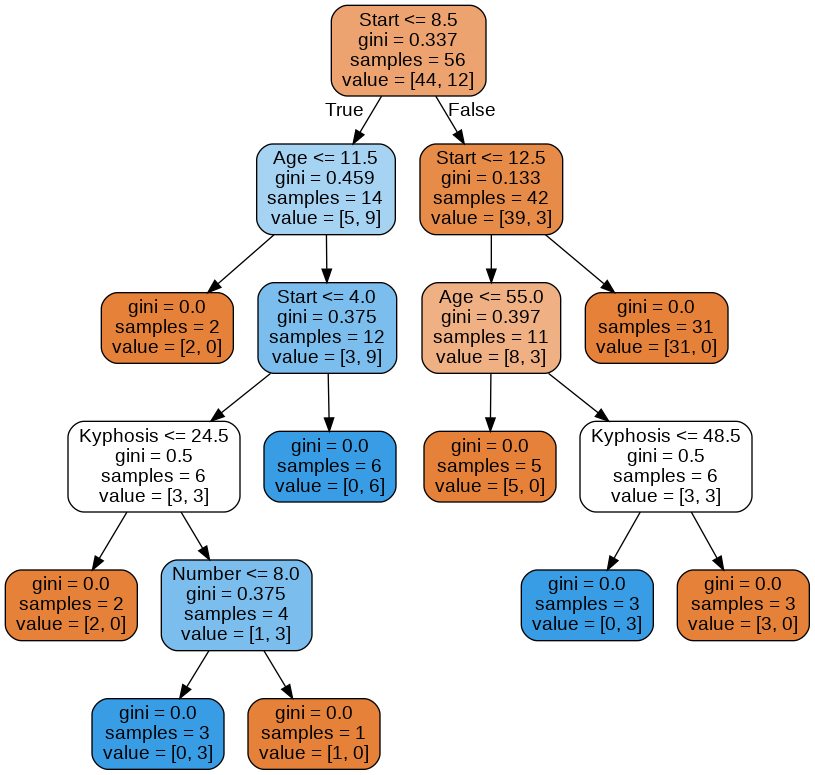

In [ ]:
features = list(df.columns[1:])
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

# Decision Tree for Classification

# Decision Tree for Regression
